In [1]:
pip install mlxtend

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
data = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')
mb = pd.DataFrame(data)
mb.head(1)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit


In [4]:
# Extract the items for each transaction
transactions = mb.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)
transactions.head()

Member_number  Date      
1000           15-03-2015    [sausage, whole milk, semi-finished bread, yog...
               24-06-2014                    [whole milk, pastry, salty snack]
               24-07-2015                       [canned beer, misc. beverages]
               25-11-2015                          [sausage, hygiene articles]
               27-05-2015                           [soda, pickled vegetables]
Name: itemDescription, dtype: object

In [5]:
# Apply one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)

In [7]:
rules = association_rules(frequent_itemsets, metric="lift")

In [8]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
4,(sausage),(UHT-milk),0.060349,0.021386,0.001136,0.018826,0.880298,-0.000154,0.997391,-0.126418


In [9]:
rules.sort_values(['support', 'confidence', 'lift']).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
598,(whole milk),(pot plants),0.157923,0.007819,0.001002,0.006348,0.811821,-0.000232,0.998519,-0.215852
545,(other vegetables),(semi-finished bread),0.122101,0.009490,0.001002,0.008210,0.865133,-0.000156,0.998710,-0.150796
536,(other vegetables),(pot plants),0.122101,0.007819,0.001002,0.008210,1.049991,0.000048,1.000394,0.054233
616,(rolls/buns),(soft cheese),0.110005,0.010025,0.001002,0.009113,0.909052,-0.000100,0.999080,-0.101053
305,(rolls/buns),(detergent),0.110005,0.008621,0.001002,0.009113,1.057037,0.000054,1.000496,0.060629


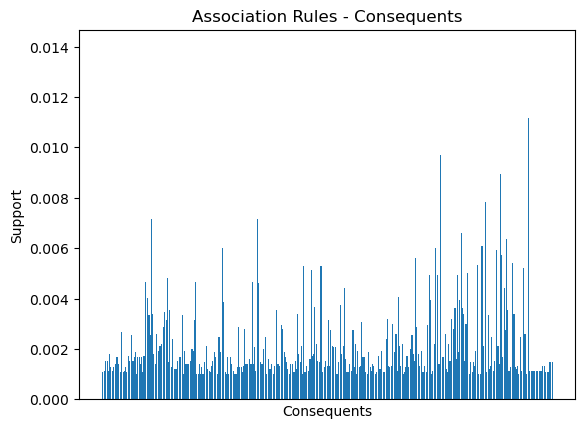

In [16]:
# Plotting the consequents
plt.bar(range(len(rules.consequents)), rules.support, tick_label=rules.consequents)
plt.xticks([])
plt.xlabel('Consequents')
plt.ylabel('Support')
plt.title('Association Rules - Consequents')
plt.show()

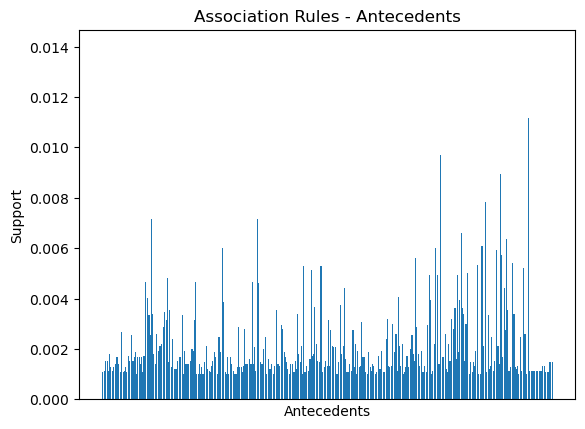

In [15]:
# Plotting the antecedents
plt.bar(range(len(rules.antecedents)), rules.support, tick_label=rules.antecedents)
plt.xticks([])
plt.xlabel('Antecedents')
plt.ylabel('Support')
plt.title('Association Rules - Antecedents')
plt.show()

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
# Create a directed graph
G = nx.DiGraph()

In [24]:
# Add edges between antecedents and consequents
for _, row in rules.head(10).iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    G.add_edge(antecedent, consequent)

In [25]:
# Plot the network graph
pos = nx.spring_layout(G, k=0.3)

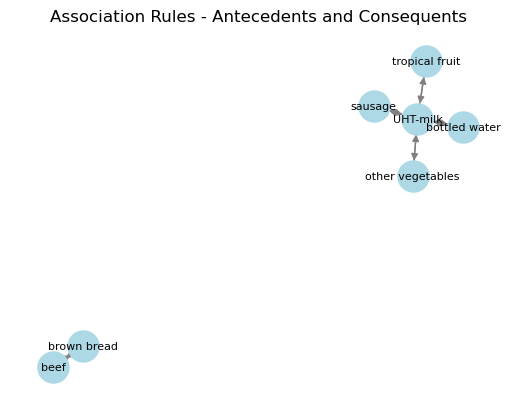

In [26]:
# Position nodes using the spring layout algorithm
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, edge_color='gray')
plt.title('Association Rules - Antecedents and Consequents')
plt.axis('off')
plt.show()